In [2]:
#import the libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#data ingestion
data=pd.read_csv('./Downloads/Data/train.csv')

In [4]:
data.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [6]:
data.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [7]:
data.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [8]:
#Not much cleaning needed,dropping missing values
data=data.dropna()

In [9]:
data.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

**For insights,I use a plot to bring out variations in crop damage brought about by crop type. Different crops have different chances of survival. Crop 0 has more chances of survival,represented by damage=0**

Chances of Crop Damage
Crop_Type
0    0.194852
1    0.177667
Name: Crop_Damage, dtype: float64


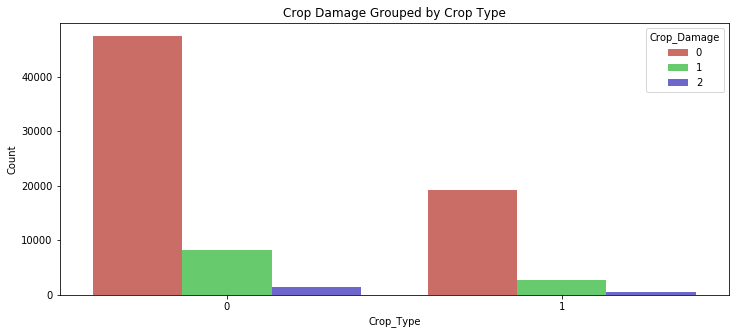

In [10]:
#chances of crop damage by each crop type
print("Chances of Crop Damage")
print(data.groupby('Crop_Type')['Crop_Damage'].mean())
plt.figure(figsize=(12,5))
#visualizing crop damage by crop type
sns.countplot(x='Crop_Type',data=data,palette='hls',hue="Crop_Damage")
plt.xlabel("Crop_Type")
plt.ylabel("Count")
plt.title("Crop Damage Grouped by Crop Type")
plt.show()

**This next plot shows the relationship between estimated insect count and crop damage. It's expected that the higher the insect concentration per square metre,the higher the damage**

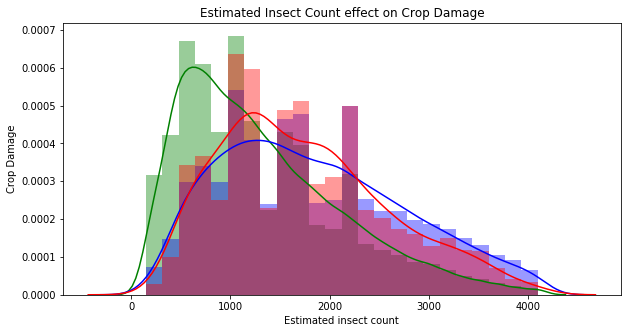

In [11]:
low_damage=data[(data["Estimated_Insects_Count"]>0) & (data["Crop_Damage"]==0)]
medium_damage=data[(data["Estimated_Insects_Count"]>0) & (data["Crop_Damage"]==1)]
high_damage=data[(data["Estimated_Insects_Count"]>0) & (data["Crop_Damage"]==2)]
plt.figure(figsize=(10,5))

#making the plot
sns.distplot(low_damage["Estimated_Insects_Count"],bins=24,color='g')
sns.distplot(medium_damage["Estimated_Insects_Count"],bins=24,color='b')
sns.distplot(high_damage["Estimated_Insects_Count"],bins=24,color='r')

plt.title("Estimated Insect Count effect on Crop Damage")
plt.xlabel("Estimated insect count")
plt.ylabel("Crop Damage")
plt.show()

**To predict the crop damage using the other these two and the other provided variables in the data,I use classification since the target variable is categorical**

In [12]:
y=data[['Crop_Damage']].copy()

In [13]:
x=data[['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit','Season']]

In [14]:
x.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [15]:
y.columns

Index(['Crop_Damage'], dtype='object')

In [16]:
y.head()

,Crop_Damage
0,0
1,1
2,1
3,1
4,1


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=324)

In [29]:
x_test.head()
#x_train.describe()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
88136,1385,0,1,2,15,41.0,4,2
55949,1785,0,0,1,0,0.0,0,1
58592,577,0,0,3,20,25.0,0,2
65295,1132,0,1,2,40,21.0,14,2
44669,3337,0,0,2,20,40.0,11,1


In [19]:
crop_damage_classifier=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
crop_damage_classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
type(crop_damage_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [21]:
predictions=crop_damage_classifier.predict(x_test)

In [22]:
predictions[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_test[:10]

,Crop_Damage
88136,0
55949,1
58592,0
65295,0
44669,1
62359,1
66489,1
14283,0
36878,0
82936,0


In [24]:
accuracy_score(y_true=y_test,y_pred=predictions)

0.8366851331866131

**After training the model,I ingest the test data that has all the predictor columns just as the train dataset but lacks the target variable. The model should predict this for us**

In [25]:
test=pd.read_csv('./Downloads/Data/test.csv')

In [26]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [31]:
#clean missing values
test=test.dropna()


In [33]:
test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [36]:
#delete the ID column as its not a predictor
del test['ID']

In [38]:
data_predictions=crop_damage_classifier.predict(test)
data_predictions[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)